In [1]:
from document_pipeline import DocumentPipeline

pipeline = DocumentPipeline()

In [2]:
pipeline.load("storage/run2")

In [6]:
pipeline.triplet_handler.graph.vs[0]

igraph.Vertex(<igraph.Graph object at 0x000001BFA40A3350>, 0, {'entity_name': 'ZIYU WANG', 'type': 'PERSON', 'descriptions': ['Ziyu Wang is a researcher associated with Google DeepMind, contributing to advancements in deep reinforcement learning.'], 'desc': 'Ziyu Wang is a researcher associated with Google DeepMind, contributing to advancements in deep reinforcement learning.', 'name': 'PERSON ZIYU WANG'})

In [3]:
import leidenalg
import igraph as ig

In [4]:
partition = leidenalg.find_partition(pipeline.triplet_handler.graph, leidenalg.ModularityVertexPartition)

In [5]:
from igraph import Graph


communities: list[Graph] = partition.subgraphs()

In [6]:
from graphs.graph_utils import create_outside_connections


outside_connections = create_outside_connections(pipeline.triplet_handler.graph, partition)

In [7]:
outside_connections

{0: {4: {8: [7]}, 1: {28: [39]}},
 1: {3: {31: [34]}, 0: {31: [39]}, 5: {31: [49]}},
 2: {4: {19: [21]}},
 3: {1: {34: [34]}},
 4: {0: {7: [7]}, 2: {7: [21]}},
 5: {1: {47: [49]}},
 6: {},
 7: {},
 8: {}}

In [9]:
from graphs.graph_utils import localize_connections


local_connections = localize_connections(pipeline.triplet_handler.graph, communities[0], outside_connections[0])

In [10]:
local_connections

{4: [0], 1: [6]}

In [13]:
pipeline.triplet_handler.graph.vs[28]

igraph.Vertex(<igraph.Graph object at 0x000002B320287350>, 28, {'entity_name': 'DDQN', 'type': 'ALGORITHM', 'descriptions': ['DDQN, or Double Deep Q-Network, is an algorithm that addresses the overestimation bias of Q-learning by using two separate networks to estimate the Q-values.', 'DDQN (Double Deep Q-Network) is an algorithm that addresses the overestimation bias of Q-learning by using two separate networks to estimate action values.'], 'desc': 'DDQN, or Double Deep Q-Network, is an algorithm designed to mitigate the overestimation bias in Q-learning by employing two distinct networks to estimate Q-values or action values.', 'name': 'ALGORITHM DDQN'})

In [14]:
communities[0].vs[6]

igraph.Vertex(<igraph.Graph object at 0x000002B320287650>, 6, {'entity_name': 'DDQN', 'type': 'ALGORITHM', 'descriptions': ['DDQN, or Double Deep Q-Network, is an algorithm that addresses the overestimation bias of Q-learning by using two separate networks to estimate the Q-values.', 'DDQN (Double Deep Q-Network) is an algorithm that addresses the overestimation bias of Q-learning by using two separate networks to estimate action values.'], 'desc': 'DDQN, or Double Deep Q-Network, is an algorithm designed to mitigate the overestimation bias in Q-learning by employing two distinct networks to estimate Q-values or action values.', 'name': 'ALGORITHM DDQN'})

In [38]:
communities[0].vs.find("GAME ATARI 2600").incident()

[igraph.Edge(<igraph.Graph object at 0x000001BF4FFF3650>, 0, {'descriptions': ['The dueling network architecture is evaluated on the Atari 2600 testbed, demonstrating its effectiveness in playing various games.'], 'strength': 9, 'desc': 'The dueling network architecture is evaluated on the Atari 2600 testbed, demonstrating its effectiveness in playing various games.'}),
 igraph.Edge(<igraph.Graph object at 0x000001BF4FFF3650>, 1, {'descriptions': ['Deep Q-Networks are applied to the Atari 2600 games, where they learn to play by observing game states and scores.'], 'strength': 8, 'desc': 'Deep Q-Networks are applied to the Atari 2600 games, where they learn to play by observing game states and scores.'})]

In [37]:
list(communities[0].es)

[igraph.Edge(<igraph.Graph object at 0x000001BF4FFF3650>, 0, {'descriptions': ['The dueling network architecture is evaluated on the Atari 2600 testbed, demonstrating its effectiveness in playing various games.'], 'strength': 9, 'desc': 'The dueling network architecture is evaluated on the Atari 2600 testbed, demonstrating its effectiveness in playing various games.'}),
 igraph.Edge(<igraph.Graph object at 0x000001BF4FFF3650>, 1, {'descriptions': ['Deep Q-Networks are applied to the Atari 2600 games, where they learn to play by observing game states and scores.'], 'strength': 8, 'desc': 'Deep Q-Networks are applied to the Atari 2600 games, where they learn to play by observing game states and scores.'}),
 igraph.Edge(<igraph.Graph object at 0x000001BF4FFF3650>, 2, {'descriptions': ['The dueling network is an improvement over the traditional Deep Q-Networks, enhancing the learning process by separating value and advantage functions.'], 'strength': 8, 'desc': 'The dueling network is an i

In [39]:
from collections import defaultdict


communities_dict = defaultdict(list)
for idx, memb in enumerate(partition.membership):
    communities_dict[memb].append(idx)

In [15]:
for neighbour_community, conn in outside_connections.items():
    print(f"Towards community {neighbour_community}:")
    for node, edges in conn.items():
        node_ = communities[0].vs[node]
        print(f"Exit node: {node_['entity_name'], node_['type']}")
        for edge in edges:
            print(f"Exit edges: {communities[0].es[edge]['desc']}")

Towards community 0:
Exit node: ('DDQN', 'ALGORITHM')
Exit edges: Van Hasselt et al. (2015) developed the DDQN algorithm, contributing significantly to the field of deep reinforcement learning.
Exit edges: ALE provides the environment in which the DDQN algorithm is tested and evaluated.
Towards community 4:
Exit node: ('VAN HASSELT ET AL. (2015)', 'PERSON')
Exit edges: Van Hasselt et al. (2015) developed the DDQN algorithm, contributing significantly to the field of deep reinforcement learning.
Exit node: ('ALE', 'ENVIRONMENT')
Exit edges: ALE provides the environment in which the DDQN algorithm is tested and evaluated.


Membership of vertices: [4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 7, 7, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 8, 8, 3, 3, 3]


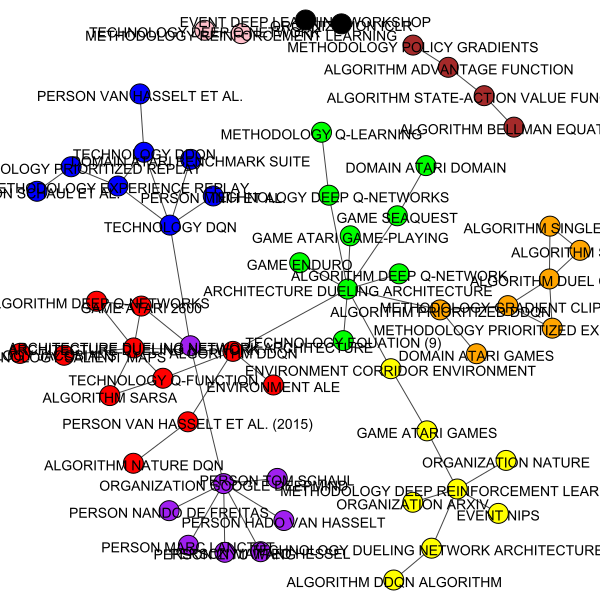

In [11]:
# Step 3: Extract and analyze the communities
# Print the membership of each vertex
print(f"Membership of vertices: {partition.membership}")

# Step 4: (Optional) Visualize the graph with communities
# Assign a color to each vertex based on its community
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'brown', 'pink', "black"]
pipeline.triplet_handler.graph.vs['color'] = [colors[partition.membership[i]] for i in range(len(partition.membership))]

# Plot the graph
layout = pipeline.triplet_handler.graph.layout("fr")
ig.plot(pipeline.triplet_handler.graph, layout=layout, vertex_label=pipeline.triplet_handler.graph.vs["name"], vertex_color=pipeline.triplet_handler.graph.vs["color"])

In [10]:
from igraph import cluster_leiden

cluster_leiden(
  pipeline.triplet_handler.graph,
  objective_function = ("CPM", "modularity"),
  weights = None,
  resolution_parameter = 1,
  beta = 0.01,
  initial_membership = None,
  n_iterations = 2,
  vertex_weights = None
)

ImportError: cannot import name 'cluster_leiden' from 'igraph' (c:\Users\leonj\miniconda3\envs\generate-dialog\Lib\site-packages\igraph\__init__.py)